# Итоговая работа по курсу Python и математика для анализа данных

## Проектная работа по модулю Математика и статистика в Python


### 1. Загрузить файл hr.csv

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

* satisfaction_level - уровень удовлетворения работой
* last_evaluation - последняя оценка
* number_project - номер проекта
* average_montly_hours - среднее количество рабочих часов в месяц
* time_spend_company - сколько лет провел в текущей компании
* Work_accident - несчастные случаи на производстве (0 или 1)
* left - покинул или нет компанию
* promotion_last_5years - продвижение за последние 5 лет было или нет
* sales - департамент
* salary - уровень зарплаты

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

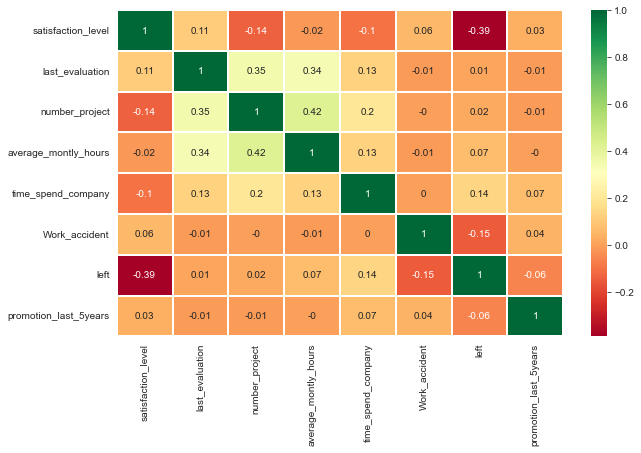

In [6]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Сильную корреляцию имеют:

* left - satisfaction_level наибольшая отрицательная -0.39 (логично, что у уволившихся людей низкий уровень удовлетворенности компанией)
* number_project - average_montly_house 0.42 (чем больше количество проектов - тем больше человек проводит время за работой)
* last_evaluation - number_project 0.35
* last_evaluation - average_montly_company 0.34

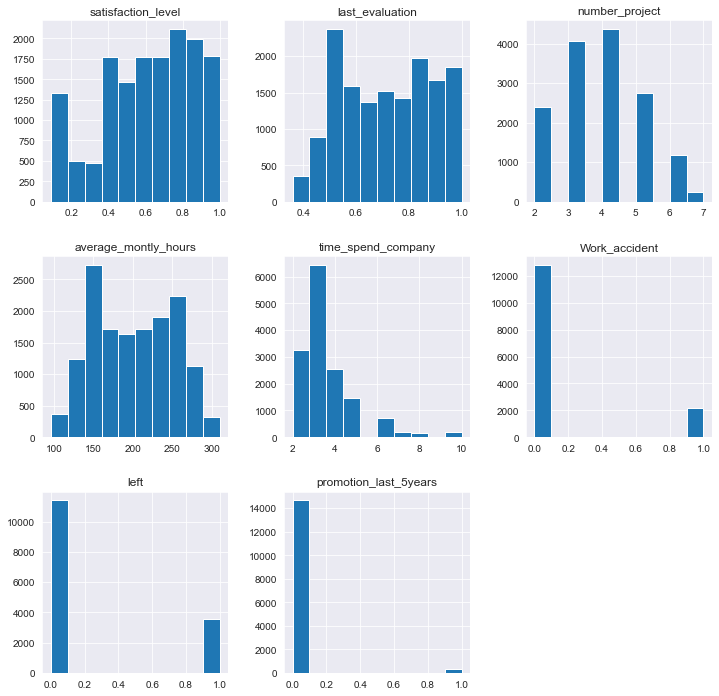

In [7]:
# Посмотрим частотный график для всех колонок (график histograms):

data.hist(figsize=(12,12))
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

In [15]:
уровень удовлетворенности - уровень зарплаты
покинул - сколько работал в компании
уровень удовлетворенности - покинул
last_evaluation - уровень удовлетворенности

SyntaxError: invalid syntax (2370427578.py, line 1)

Посмотрим взаимосвязь между уровнем зарплаты и уровнем удовлетворенности от работы

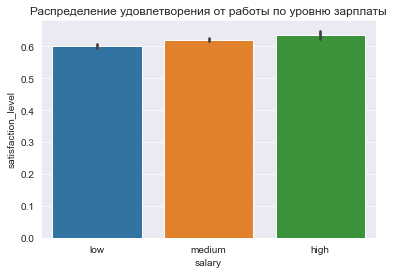

In [8]:
sns.barplot(data=data, x='salary', y='satisfaction_level')
plt.title('Распределение удовлетворения от работы по уровню зарплаты')
plt.show()

Чем выше зарплата, тем выше удовлетворенность от работы

Посмотрим взаимосвязь количества проектов и рабочими часами за месяц

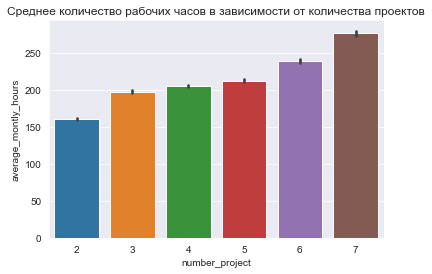

In [9]:
sns.barplot(data=data, x='number_project', y='average_montly_hours')
plt.title('Среднее количество рабочих часов в зависимости от количества проектов')
plt.show()

Чем больше у сотрудника проектов, тем больше часов в месяц он работает

Построим взаимосвязь last_evaluation и average_montly_hours

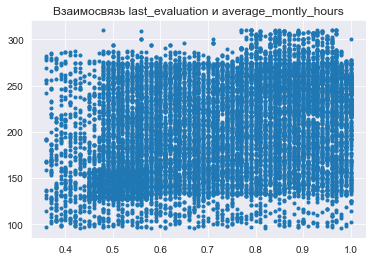

In [10]:
plt.scatter(data['last_evaluation'], data['average_montly_hours'], marker='.')
plt.title('Взаимосвязь last_evaluation и average_montly_hours')
plt.show()

График получился неинформативен

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Проверим, есть ли разница в оценке удовлетворенности работы среди людей, у которых был несчастный случай на производстве и всех остальных сотрудников 

Н0 - две средние совокупности равны

Н1 - две средние совокупности НЕ равны

In [11]:
# work_accident1 - Выборка 1. Уровень удовлетворенности от работы сотрудников, 
# у которых был несчастный случай на производстве
# data['satisfaction_level'] - Выборка 2. Уровень удовлетворенности от работы всех сотрудников

work_accident1 = data[data['Work_accident'] == 1]['satisfaction_level']
stats.ttest_1samp(work_accident1, data['satisfaction_level'].mean()) 

Ttest_1sampResult(statistic=7.149991902356118, pvalue=1.181176636010934e-12)

p-value меньше 0.05, таким образом, можно отвергнуть нулевую гипотезу и сделать вывод, что уровень удовлетворенности от работы у сотрудников с несчастным случаем на производстве значительно снижен.

Сравним две группы людей: уволившиеся и работающие сотрудники по показателю last_evaluation

In [12]:
left = data[data['left']==1]['last_evaluation']

work = data[data['left']==0]['last_evaluation']

stats.ttest_ind(left, work) #считаем т тест для 2-х выборок

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [14]:
# проверка что можем проводить т тест (дисперсии должны быть одинаковыми)

print(np.var(left), np.var(work))

0.03906381370637069 0.02624330932037166


p-value больше 0.05, значит между двумя выборками нет статистической разницы

### 6. Рассчитать сколько работников работает в каждом департаменте

In [42]:
dept = data['sales'].value_counts()

Визуализируем распределение количества работников по департаментам

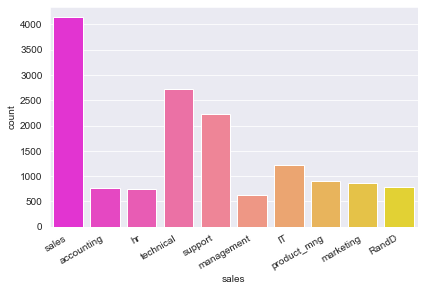

In [32]:
fig,ax=plt.subplots()
sns.countplot(x='sales',data=data, palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

### 7. Показать распределение сотрудников по зарплатам

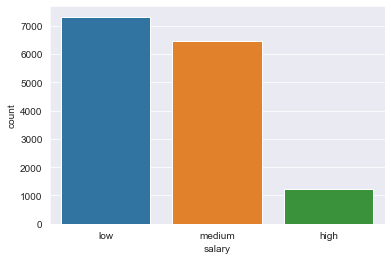

In [41]:
sns.countplot(x='salary',data=data)
plt.show()

График наглядно показывает, что только у 1000 сотрудников высокая зарплата, при этом количество сотрудников с низкой и средней зарплатой примерно одинаково 6500 - 7200 человек

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

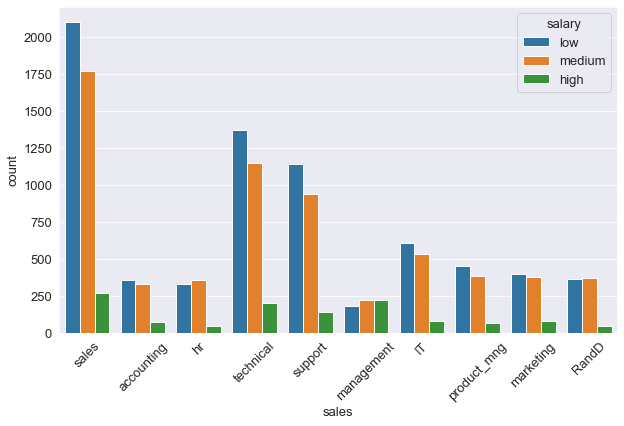

In [71]:
plt.figure(figsize=(10,6))
plt.rc('font', size = 13)
sns.countplot(x='sales', data=data, hue = 'salary')
plt.xticks(rotation=45)
plt.show()

График показывает распределение сотрудников по зарплатам и департаментам

Суммарно, в департаменте управления работает меньше всего сотрудников, при этом количество работников с высокой зарплатой там такое же как со средней и сопоставимое с низкой. Во всех остальных департаментах больше всего работников с низкой и средней зарплатой, и значительно меньше - с высокой.

### 9. Сколько сотрудников покинули компанию

In [72]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Компанию покинули 3571 сотрудников

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

#### Проверим, какое количество людей покинуло компанию, если их уровень удовлетворенности компанией был ниже 0.40

In [74]:
low_satisfaction = data[data['satisfaction_level'] < 0.4 ]

In [75]:
low_satisfaction.left.value_counts()

1    1566
0    1349
Name: left, dtype: int64

Треть всех сотрудников, покинувших компанию имели уровень удовлетворенности работой меньше 0.4

Посмотрим, как выглядит распределение satisfaction_level у людей, покинувших компанию

In [93]:
left = data[data['left'] == 1]['satisfaction_level']
left.head()

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

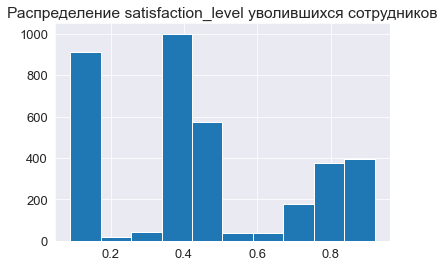

In [92]:
left.hist()
plt.title('Распределение satisfaction_level уволившихся сотрудников')
plt.show()

Данные имеют несколько пиков, больше всего уволилось сотрудников, уровень удовлетворенности компанией которых составлял 0.1-0.2 и 0.4

In [112]:
left.describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

Квартильный размах уровня удовлетворенности работой у уволившихся сотрудников 0.13 - 0.73, медианное значение = 0.41

Посмотрим как распределяются значения удовлетворенности работой у работающих в компании сотрудников

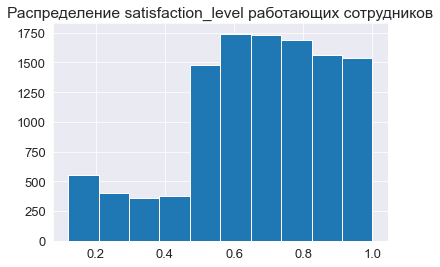

In [94]:
work = data[data['left'] == 0]['satisfaction_level']

work.hist()
plt.title('Распределение satisfaction_level работающих сотрудников')
plt.show()

График показывает, что большинство работающих сотрудников имеют уровень удовлетворенности работой 0.5 и выше

In [113]:
work.describe()

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64

Интерквартильный размах удовлетворенности работающих сотрудников 0.54 - 0.84, медиана = 0.69. Полученные данные сильно отличаются от уволившихся сотрудников, это позволяет сделать вывод, что satisfaction_level отображает одну из причин увольнения сотрудников.

#### Проверим гипотезу, что увольнения связаны с несчастными случаями на производстве. Посмотрим, как распределены несчастные случаи среди сотрудников по категории left

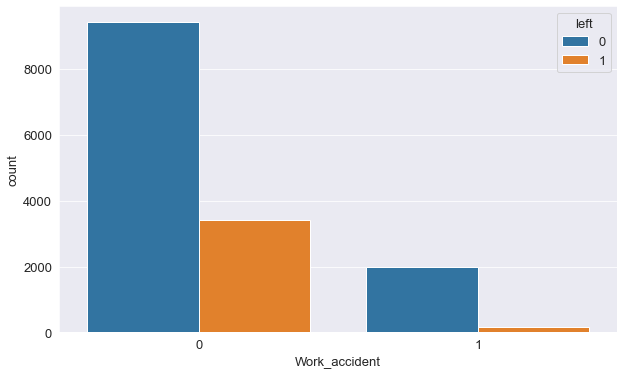

In [88]:
plt.figure(figsize=(10,6))
plt.rc('font', size = 13)
sns.countplot(x='Work_accident', data=data, hue = 'left')
plt.show()

График наглядно показывает, что количество уволившихся сотрудников с несчастным случаем очень мало. Следовательно, несчастные случаи не влияли на решение об увольнении.

#### Проверим, отличается ли количество рабочих часов в месяц у уволившихся и работающих сотрудников.

In [118]:
hours_work = data[data['left'] == 0]['average_montly_hours']

In [119]:
hours_left = data[data['left'] == 1]['average_montly_hours']

In [120]:
stats.ttest_ind(hours_work, hours_left)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

Т-тест показал p-value значительно меньше 0.5. Проверим гипотезу так же по критерию Манна-Уитни

In [122]:
stats.mannwhitneyu(hours_work, hours_left)

MannwhitneyuResult(statistic=19119787.5, pvalue=1.2769565984354332e-08)

Критерий Манна-Уитни показал значение p-value в десять раз больше чем т-тест, но при этом также значительно меньше 0.5

По итогам двух тестов мы отвергаем нулевую гипотезу и приходим к выводу что количество рабочих часов в месяц у работающих и уволившихся сотрудников отличается.

Попробуем поподробнее рассмотреть значения average_montly_hours для уволившихся и работающих сотрудников.

/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


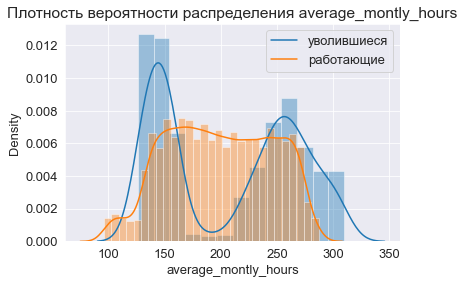

In [123]:
sns.distplot(hours_left)
sns.distplot(hours_work)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['уволившиеся', 'работающие'])
plt.show()

График показывает, что распределение average_montly_hours у уволившихся и работающих сотрудников заметно отличается

In [124]:
hours_left.describe()

count    3571.000000
mean      207.419210
std        61.202825
min       126.000000
25%       146.000000
50%       224.000000
75%       262.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [125]:
hours_work.describe()

count    11428.000000
mean       199.060203
std         45.682731
min         96.000000
25%        162.000000
50%        198.000000
75%        238.000000
max        287.000000
Name: average_montly_hours, dtype: float64

Дисперсия average_montly_hours у уволившихся сотрудников значительно отличается от дисперсии работающих сотрудников, это же демонстрирует и график плотности вероятности average_montly_hours.

Average_montly_hours уволившихся сотрудников имеет 2 пика: 130-150 и 250-270 часов в месяц. То есть значительно число уволившихся сотрудников либо работали недостаточное количество часов в месяц, либо же перерабатывали, исходим из 40-часовой рабочей неделе (164 рабочих часов в месяц в среднем). Следовательно, переработки могут выступать одной из причин для увольнения сотрудников.

#### Посмотрим, сколько лет работают в компании уволившиеся и действующие сотрудники

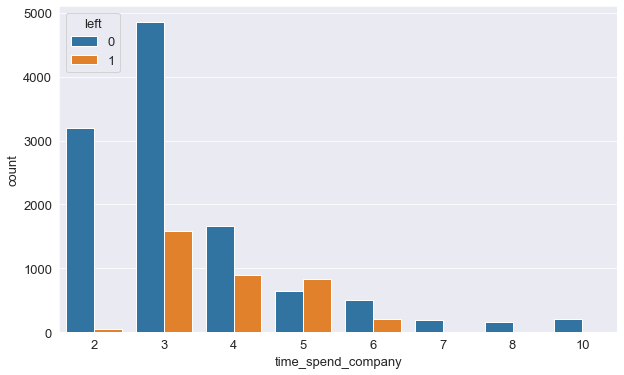

In [127]:
plt.figure(figsize=(10,6))
plt.rc('font', size = 13)
sns.countplot(x='time_spend_company', data=data, hue = 'left')
plt.show()

In [146]:
time_left = data[data['left'] == 1]

time_left['time_spend_company'].value_counts()


3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

In [147]:
time_w = data[data['left'] == 0]

time_w['time_spend_company'].value_counts()

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

Распределение стажа у сотрудников довольно интересное, люди практически не увольняются, если проработали 2 года. В 3 года происходит резкий скачок увольнений, эта тенденция сохраняется к 5 годам. Примечательно, что количество уволившихся сотрудников через 5 лет работы больше, чем количество действующих сотрудников со стажем работы 5 лет.Тенденция на увольнение сокращается к 6 годам, далее, если сотрудник проработал 6 лет и не уволился, он уже и не увольняется.